In [50]:
!pip install seaborn



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns


In [35]:
df = pd.read_csv(r"C:\Users\qfu88\Desktop\KwF\Bioacoustics-analysis\Datas\combined.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634921 entries, 0 to 634920
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   clip_name             634921 non-null  object 
 1   Recorder              634921 non-null  object 
 2   Timestamp             634921 non-null  object 
 3   Duration (sec)        634921 non-null  float64
 4   Sample Rate (Hz)      634921 non-null  int64  
 5   Channels              634921 non-null  int64  
 6   Bit Depth             634921 non-null  int64  
 7   File Size (KB)        634921 non-null  float64
 8   Battery Voltage       634921 non-null  object 
 9   Gain                  634921 non-null  object 
 10  Spectral Centroid     634921 non-null  float64
 11  Zero Crossing Rate    634921 non-null  float64
 12  Human Activity        634921 non-null  object 
 13  Human Activity Score  634921 non-null  float64
 14  start                 634921 non-null  float64
 15  

## Data Cleaning

In [37]:
## drop the cols that only have one unique value

cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

print(cols_to_drop)

['Sample Rate (Hz)', 'Channels', 'Bit Depth', 'Battery Voltage', 'Gain', 'start']


In [38]:
## I don't want to only drop "start", so I keep it for now

df = df.drop(columns= ['Sample Rate (Hz)','Channels','Bit Depth', 'Battery Voltage', 'Gain'])

## Feature Based Exploration

I plan to conduct several analyses to answer specific questions. 
For each question, I will first explore the features (columns) relevant to that question. 
For example, if a question involves environmental conditions and bird activity, I will begin by exploring those related features. 
After the initial exploration, I will dive deeper to perform targeted analysis and draw conclusions based on the findings.


### EXploring Environmental Conditions VS Bird Species Confidence

Questions I can answer like:

1, Which weather conditions lead to the highest confidence in species detection?

2, Do certain bird species get detected more confidently during specific weather conditions?

3, Is there a pattern between windspeed or temperature and detection confidence for active species?

**key Features involved: confidence, species, Temperature, Windspeed, Weather_Desc, Human Activity and score. **

#### Feature One: Confidence

In [39]:
## first, filter out the clips that have no detection confidence 

df_con = df[df['confidence'] != '[]']

In [40]:
##check what's the value look like in confidence 
df_con[["confidence"]].tail(10)

,confidence
634717,[0.9083453]
634718,[0.9631853]
634727,[0.45411408]
634735,[0.3463811]
634741,[0.27142888]
634750,[0.25755468]
634787,[0.27244568]
634797,[0.4235891]
634798,[0.4276261]
634855,[0.25457552]


In [41]:
df_con[["confidence"]].shape

(109745, 1)

In [42]:
ratio = len(df_con) / len(df)
print(f"Ratio of clips with confidence scores: {ratio:.2%}")


Ratio of clips with confidence scores: 17.28%


In [ ]:
# randomly check raw type and content of a few entries
for i in range(5):
    print(type(df_con['confidence'].iloc[i]), df_con['confidence'].iloc[i])


<class 'str'> [0.34153312]
<class 'str'> [0.26743847]
<class 'str'> [0.2847662]
<class 'str'> [0.4635468]
<class 'str'> [0.5601822]


In [46]:
##convert string into float

df_con['confidence'] = df_con['confidence'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)

C:\Users\qfu88\AppData\Local\Temp\ipykernel_24544\1250872818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['confidence'] = df_con['confidence'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)


In [ ]:
##confirm
print(df_con['confidence'].head())
print(df_con['confidence'].dtype)


105    0.341533
114    0.267438
128    0.284766
208    0.463547
347    0.560182
Name: confidence, dtype: float64
float64


In [48]:
##check the distribution
df_con['confidence'].describe()

count    109745.000000
mean          0.489202
std           0.215822
min           0.250000
25%           0.311487
50%           0.416257
75%           0.620633
max           1.000000
Name: confidence, dtype: float64

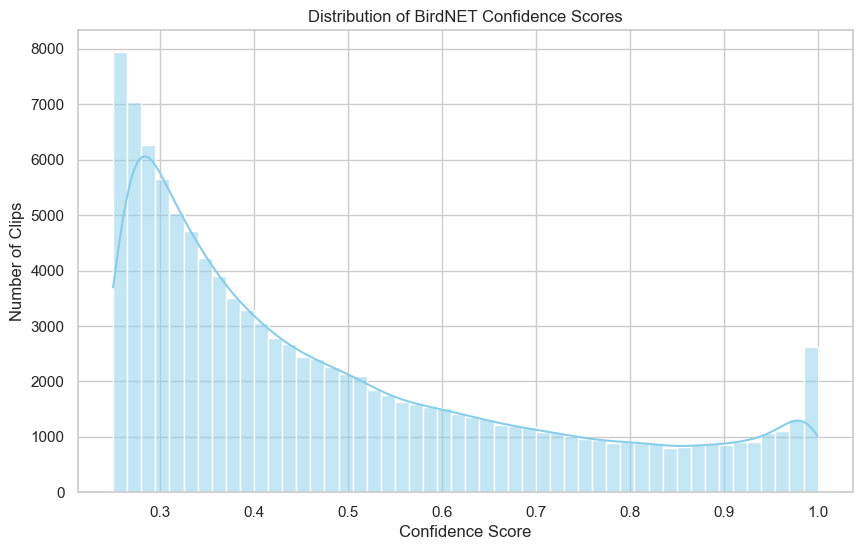

In [52]:
#visulize the distribution

sns.set(style="whitegrid")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_con['confidence'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of BirdNET Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Number of Clips")
plt.show()


#### Feature Two: species. 

In [53]:
## check basic info
print("Species Summary")
print(df_con['species'].describe())


Species Summary
count                                         109745
unique                                          1027
top       ['Pulsatrix perspicillata_Spectacled Owl']
freq                                           16577
Name: species, dtype: object


In [54]:
## checking for missing or invalid species values

df_con['species'].apply(lambda x: not isinstance(x, str) or x.strip() == '').value_counts()


species
False    109745
Name: count, dtype: int64

In [56]:
#inspect a few clips 

for i in range(5):
    print(type(df_con['species'].iloc[i]), df_con['species'].iloc[i])


<class 'str'> ['Hylophylax naevioides_Spotted Antbird']
<class 'str'> ['Mionectes olivaceus_Olive-striped Flycatcher']
<class 'str'> ['Mionectes olivaceus_Olive-striped Flycatcher']
<class 'str'> ['Malacoptila panamensis_White-whiskered Puffbird']
<class 'str'> ['Thamnophilus bridgesi_Black-hooded Antshrike']


In [57]:
#convert stringified list to a plain string 

df_con['species'] = df_con['species'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)

C:\Users\qfu88\AppData\Local\Temp\ipykernel_24544\3303309375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['species'] = df_con['species'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None)


In [58]:
#confirm
print(df_con['species'].head())
print(df_con['species'].dtype)


105              Hylophylax naevioides_Spotted Antbird
114       Mionectes olivaceus_Olive-striped Flycatcher
128       Mionectes olivaceus_Olive-striped Flycatcher
208    Malacoptila panamensis_White-whiskered Puffbird
347       Thamnophilus bridgesi_Black-hooded Antshrike
Name: species, dtype: object
object


In [60]:
# get the top 10 species
top_species = df_con['species'].value_counts().head(10)
print(top_species)

species
Ciccaba nigrolineata_Black-and-white Owl           24998
Pulsatrix perspicillata_Spectacled Owl             17820
Lophostrix cristata_Crested Owl                    10000
Myiothlypis fulvicauda_Buff-rumped Warbler          9283
Habia atrimaxillaris_Black-cheeked Ant-Tanager      7663
Myiornis atricapillus_Black-capped Pygmy-Tyrant     4584
Thamnophilus bridgesi_Black-hooded Antshrike        2656
Patagioenas nigrirostris_Short-billed Pigeon        2449
Microrhopias quixensis_Dot-winged Antwren           2419
Tinamus major_Great Tinamou                         2219
Name: count, dtype: int64


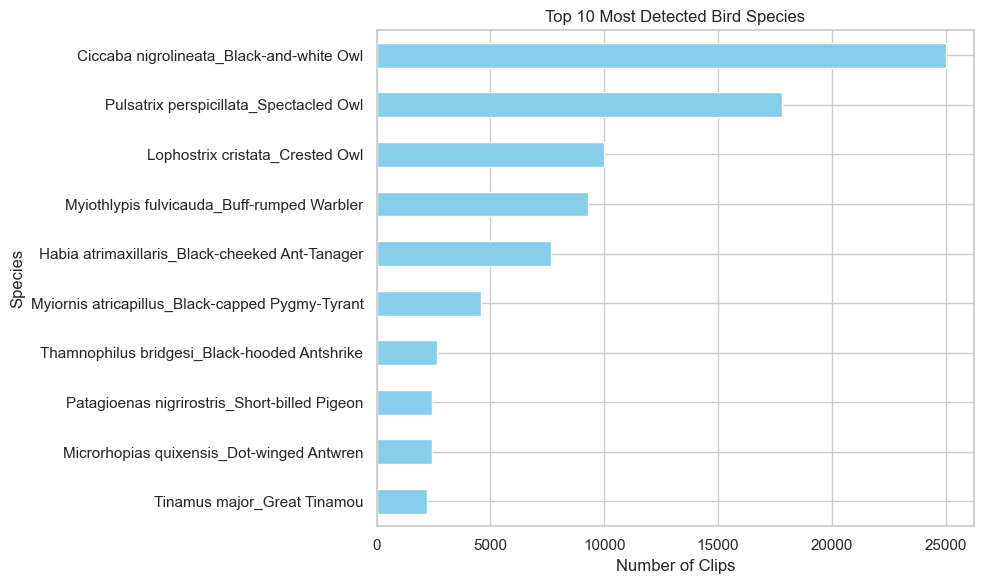

In [ ]:
#plot top 10 species

plt.figure(figsize=(10, 6))
top_species.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Clips")
plt.ylabel("Species")
plt.title("Top 10 Most Detected Bird Species")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

#### Feature Three: Weather_Desc

In [63]:
df_con.columns

Index(['clip_name', 'Recorder', 'Timestamp', 'Duration (sec)',
       'File Size (KB)', 'Spectral Centroid', 'Zero Crossing Rate',
       'Human Activity', 'Human Activity Score', 'start', 'end', 'species',
       'confidence', 'Sim Type', 'Sim Relative Time', 'Datetime',
       'Temperature', 'Windspeed', 'Precipitation', 'Humidity', 'Weathercode',
       'Weather Desc', 'Timestamp Local', 'Sunrise', 'Sunset', 'Time Of Day'],
      dtype='object')

In [64]:
#basic info
print("Weather_Desc Summary")
print(df_con['Weather Desc'].describe())


Weather_Desc Summary
count       109745
unique           8
top       Overcast
freq         37877
Name: Weather Desc, dtype: object


In [65]:
df_con["Weather Desc"].value_counts()


Weather Desc
Overcast            37877
Clear sky           29328
Light drizzle       19383
Mainly clear        14301
Partly cloudy        4949
Slight rain          1595
Dense drizzle        1458
Moderate drizzle      854
Name: count, dtype: int64